<a href="https://colab.research.google.com/github/eliseleahy/Pytorch-Tutorials/blob/main/02_Pytorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with Pytroch

Classification is predicting whether something is one thing or another

## 1. Make some data and get it ready



In [211]:
import sklearn

In [212]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [213]:
len(X), len(y)

(1000, 1000)

In [214]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [215]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [216]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

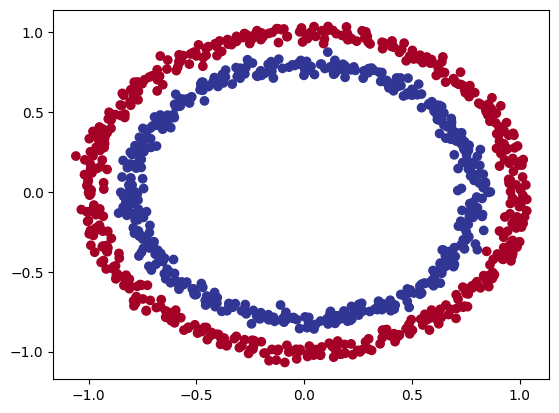

In [217]:
# plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [218]:
X.shape, y.shape

((1000, 2), (1000,))

In [219]:
# Veiw the fist examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [220]:
import torch
torch.__version__

'2.0.1+cu118'

In [221]:
# Turn data into tensors

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [222]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #0.2 = 20% of test data
                                                    random_state=42)

len(X_train), len(X_test)


(800, 200)

## 2. Building a model

lets build a model to classify the blue and red dots

To do so, we want to :
1. Setup device agnostic code
2. construct a model (by subclassing nn.module)
3. Define a loss function and optimiser
4. create a training and test loop


In [223]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

Now we ahve set up device agnostic code, lets create a model:

1. Subclass 'nn.module' (almost all models in PyTorch subclass 'nn.Module')
2. Create 2 'nn.linear()' Layers that are capable of handling data
3. Define a 'forward()' method that outlines the forward pass
4. Instatiate an instance of our model class and send it to the target device

In [224]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        #self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        #self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

        self.two_linear_layers = nn.Sequential(
          nn.Linear(in_features=2, out_features=5),
          nn.Linear(in_features=5, out_features=1)
          )
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        #return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2
        return two_linear_layers(x)

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [225]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [226]:
# Let's replicate the model aboce using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [227]:

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]], device='cuda:0')),
             ('1.bias', tensor([0.2859], device='cuda:0'))])

In [228]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of Preds :{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample :{len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 Predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 Labels:\n{y_test[:10]}")

Length of Preds :200, Shape: torch.Size([200, 1])
Length of test sample :200, Shape: torch.Size([200, 2])

First 10 Predictions:
tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853],
        [0.1785],
        [0.2280],
        [0.1960],
        [0.2965],
        [0.3120]], device='cuda:0')

First 10 Labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [229]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Loss Function and Optimiser

For the loss function were gogin to use torch.nn.BECWithLogitsLoss

In [230]:
#Set up loss function
#loss_fn = nn.BCELoss() #Requires inputs to have gone through sigmiod actviation function
loss_fn = nn.BCEWithLogitsLoss() #Sigmoid activation function built in

optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1
                            )

In [231]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]], device='cuda:0')),
             ('1.bias', tensor([0.2859], device='cuda:0'))])

In [232]:
# Calculate accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train Model

Build training loop:
1. Forward pass
2. Calculate loss
3. Optimise Zero Grad
4. Backward pass (Back Propogation)
5. Optimiser step (Gradient Descent)

### 3.1 Going from raw logits -> prediction probs -> predict labels

Our model outputs are gogin to be raw **logits**

We can convert these **Logits** into prediction probabiliites by passing them to some kind of activation function (e.g. sigmoid for biniary classification and softmax for multiclass classification).

Then we can convert models pred porbs to **predict labels** by rounds or taking the argmax()

In [233]:
# View the first 5 outputs of the foward pass on test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853]], device='cuda:0')

In [234]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [235]:
# use sigmoid activation function on model logits

#turns prediction into probs
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5809],
        [0.5779],
        [0.5725],
        [0.5834],
        [0.5462]], device='cuda:0')

In [236]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [237]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In Full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze

tensor([True, True, True, True, True], device='cuda:0')


<function Tensor.squeeze>

In [238]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop


In [239]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set # of Epochs
epochs = 1000

#put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build traiing and eval loop
for epoch in range(epochs):
  ### training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = loss_fn(y_logits,
                 y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred = y_pred)

  #3. Optimise Zero Grad
  optimiser.zero_grad()

  #4. loss backward
  loss.backward()

  #5. Optimiser step
  optimiser.step()

  ### Testin
  model_0.eval()
  with torch.inference_mode():
    #1. Forward Pass
    test_logits=model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss
    test_loss = loss_fn(test_logits,
                 y_test)
    test_acc=accuracy_fn(y_true=y_test,
                  y_pred = test_pred)

  # Print
  if epoch % 10 ==0:
    print(f"Epochs {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% |Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epochs 0 | Loss: 0.70175 | Acc: 50.00% |Test Loss: 0.70198, Test acc: 50.00%
Epochs 10 | Loss: 0.69749 | Acc: 50.00% |Test Loss: 0.69785, Test acc: 50.00%
Epochs 20 | Loss: 0.69541 | Acc: 50.00% |Test Loss: 0.69580, Test acc: 50.00%
Epochs 30 | Loss: 0.69438 | Acc: 50.50% |Test Loss: 0.69477, Test acc: 50.50%
Epochs 40 | Loss: 0.69385 | Acc: 57.38% |Test Loss: 0.69425, Test acc: 54.50%
Epochs 50 | Loss: 0.69357 | Acc: 53.00% |Test Loss: 0.69397, Test acc: 53.00%
Epochs 60 | Loss: 0.69341 | Acc: 52.12% |Test Loss: 0.69383, Test acc: 54.00%
Epochs 70 | Loss: 0.69331 | Acc: 51.38% |Test Loss: 0.69375, Test acc: 51.50%
Epochs 80 | Loss: 0.69325 | Acc: 51.38% |Test Loss: 0.69371, Test acc: 52.00%
Epochs 90 | Loss: 0.69320 | Acc: 51.50% |Test Loss: 0.69369, Test acc: 51.50%
Epochs 100 | Loss: 0.69317 | Acc: 50.88% |Test Loss: 0.69369, Test acc: 50.50%
Epochs 110 | Loss: 0.69314 | Acc: 51.38% |Test Loss: 0.69369, Test acc: 50.00%
Epochs 120 | Loss: 0.69312 | Acc: 50.88% |Test Loss: 0.69371, T

## 4. Make predictions and evaluate model

From the metrics it looks like our model isn't learning, so lets inpsect the prediction by visualising the data

to do so, import a function called 'plot decision boundary'

In [240]:
import requests
from pathlib import Path

# Download helper functions repo

if Path("helper_function").is_file():
  print("helper_functions.py in already downloaded, skipping download")
else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_function.py


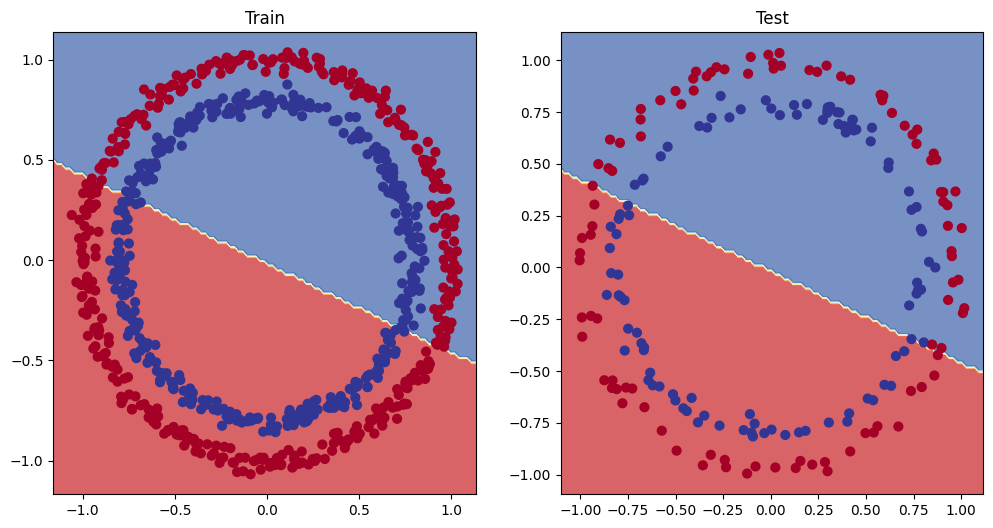

In [241]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model prepsective)

* Add more layers
* Add more hidden units (layers)
* Fit for longer
* Changing activation function
* Change the learning rate
* Change the loss function

These options are all from model perspective rather than data

And beacuse these options are all values we can change, they are refferred to as hyper parameters

In [283]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()

        #Add more hidden units 5-> 10, more layers 2->3, Increase # of epochs
        self.layer_1 = nn.Linear(in_features=1, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) # wirting it this way speeds up computation

# 4. Create an instance of the model and send it to target device
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [256]:
# Create a loss function

#Set up loss function
#loss_fn = nn.BCELoss() #Requires inputs to have gone through sigmiod actviation function
loss_fn = nn.L1Loss() #Sigmoid activation function built in

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.05
                            )
#create an optimiser


In [272]:
# Write a training and eval lopp for mdoel_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set # of Epochs
epochs = 1000

#put data to the target device
X_R_train, y_R_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build training and eval loop
for epoch in range(epochs):
  ### training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train)
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = loss_fn(y_logits,
                 y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred = y_pred)

  #3. Optimise Zero Grad
  optimiser.zero_grad()

  #4. loss backward
  loss.backward()

  #5. Optimiser step
  optimiser.step()

  ### Testin
  model_0.eval()
  with torch.inference_mode():
    #1. Forward Pass
    test_logits=model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss
    test_loss = loss_fn(test_logits,
                 y_test)
    test_acc=accuracy_fn(y_true=y_test,
                  y_pred = test_pred)

  # Print
  if epoch % 100 ==0:
    print(f"Epochs {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% |Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epochs 0 | Loss: 0.69407 | Acc: 0.00% |Test Loss: 0.66512, Test acc: 0.00%
Epochs 100 | Loss: 0.64806 | Acc: 0.00% |Test Loss: 0.40277, Test acc: 0.00%
Epochs 200 | Loss: 0.63549 | Acc: 0.00% |Test Loss: 0.34195, Test acc: 0.00%
Epochs 300 | Loss: 0.62844 | Acc: 0.00% |Test Loss: 0.30304, Test acc: 0.00%
Epochs 400 | Loss: 0.62580 | Acc: 0.00% |Test Loss: 0.28326, Test acc: 0.00%
Epochs 500 | Loss: 0.62507 | Acc: 0.00% |Test Loss: 0.27435, Test acc: 0.00%
Epochs 600 | Loss: 0.62490 | Acc: 0.00% |Test Loss: 0.27045, Test acc: 0.00%
Epochs 700 | Loss: 0.62486 | Acc: 0.00% |Test Loss: 0.26874, Test acc: 0.00%
Epochs 800 | Loss: 0.62486 | Acc: 0.00% |Test Loss: 0.26799, Test acc: 0.00%
Epochs 900 | Loss: 0.62486 | Acc: 0.00% |Test Loss: 0.26766, Test acc: 0.00%


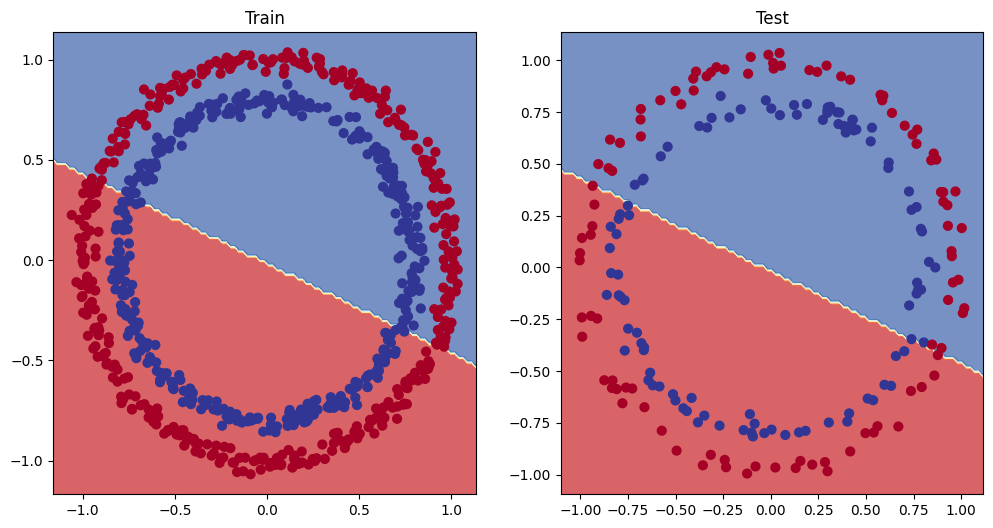

In [252]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

###Linear Regression data test

In [279]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.001
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

# Create train/test split
train_R_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_R_train, y_R_train = X[:train_R_split], y[:train_R_split]
X_R_test, y_R_test = X[train_R_split:], y[train_R_split:]

len(X_R_train), len(y_R_train), len(X_R_test), len(y_R_test)

(800, 800, 200, 200)

In [289]:
# Create a loss function

#Set up loss function
#loss_fn = nn.BCELoss() #Requires inputs to have gone through sigmiod actviation function
loss_fn = torch.nn.L1loss() #Sigmoid activation function built in

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.05
                            )
#create an optimiser


AttributeError: ignored

In [287]:
# Write a training and eval lopp for mdoel_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set # of Epochs
epochs = 1000

#put data to the target device
X_R_train, y_R_train = X_R_train.to(device), y_R_train.to(device)
X_R_test, y_R_test = X_R_test.to(device), y_R_test.to(device)

#Build traiing and eval loop
for epoch in range(epochs):
  ### training
  model_1.train()

  # 1. Forward pass
  y_R_preds = model_1(X_R_train)


  # 2. Calculate loss
  loss = loss_fn(y_R_preds,
                 y_R_train)
  acc=accuracy_fn(y_true=y_R_train,
                  y_pred = y_R_preds)

  #3. Optimise Zero Grad
  optimiser.zero_grad()

  #4. loss backward
  loss.backward()

  #5. Optimiser step
  optimiser.step()

  ### Testin
  model_0.eval()
  with torch.inference_mode():
    #1. Forward Pass
    test_preds = model_1(X_R_test)

    #2. Calculate test loss
    test_loss = loss_fn(y_R_preds,
                 test_preds)

  # Print
  if epoch % 100 ==0:
    print(f"Epochs {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% |Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




ValueError: ignored

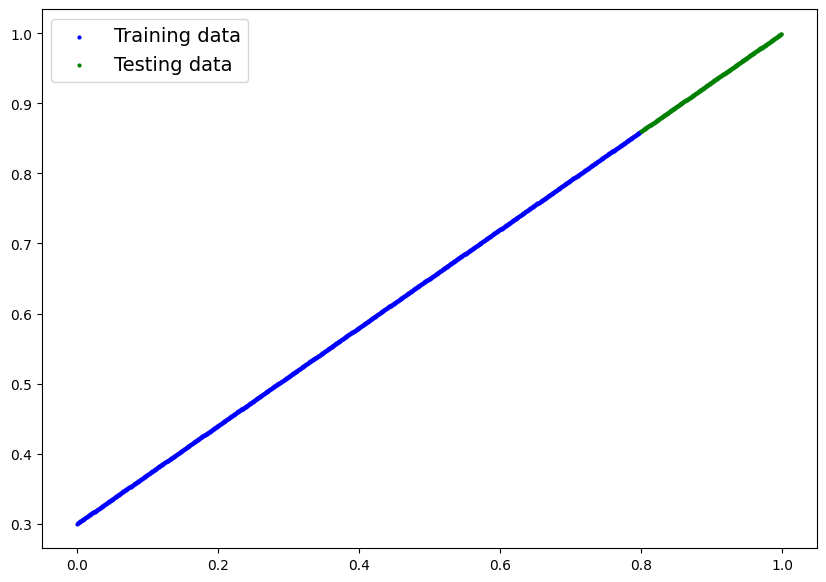

In [282]:
# Plot decision boundary of the model
#plt.figure(figsize=(12,6))
#plt.subplot(1,2,1)
#plt.title("Train")
plot_predictions(X_R_train, y_R_train, X_R_test, y_R_test)
# plt.subplot(1,2,2)
# plt.title("Test")
# plot_predictions( )